In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader 
import numpy as np
import cv2

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [3]:
dsetAbsLmks = np.load("dsetEngFeat.npy")

In [4]:
dsetAbsLmks[204].shape

(52,)

In [5]:
dsetAbsLmks[204]

array([ 1.39017297e-01, -9.75861040e-01, -1.68432248e-01, -2.57800371e-02,
       -9.60098073e-01, -2.78472763e-01, -1.31901714e-01, -9.57257325e-01,
       -2.57410861e-01,  1.38358102e-01, -9.83356886e-01, -1.17755129e-01,
        6.37783524e-02, -9.76194502e-01, -2.07308024e-01, -1.39218711e-02,
       -9.80663087e-01, -1.95207814e-01,  1.08466245e-01, -9.84731551e-01,
       -1.36157431e-01,  1.14797920e-01, -9.76425637e-01, -1.82796098e-01,
        1.85153741e-02, -9.87188508e-01, -1.58480381e-01,  1.00914509e-01,
       -9.80556175e-01, -1.68302848e-01,  1.18144098e-01, -9.85737266e-01,
       -1.19849968e-01,  7.25876526e-02, -9.92555181e-01, -9.78020747e-02,
        3.71142691e-01, -9.27637097e-01, -4.17435047e-02, -2.30931844e-01,
       -9.72361215e-01, -3.44114826e-02, -8.23091414e-01, -5.67528023e-01,
       -2.07958519e-02,  9.92203941e-01,  9.97201059e-01,  9.99015778e-01,
        9.99380755e-01,  8.65626338e-01,  1.00000000e+00,  1.60000000e+01])

In [6]:
X = dsetAbsLmks[:, :50]
y = dsetAbsLmks[:, 50:]

In [7]:
print("X.shape: ", X.shape, "\ny.shape: ", y.shape)

X.shape:  (3357, 50) 
y.shape:  (3357, 2)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
y_train[0]

array([23., 82.])

In [10]:
y_train[:5]

array([[ 23.,  82.],
       [ 20., 121.],
       [  5.,  16.],
       [ 14.,  39.],
       [ 16., 186.]])

In [11]:
numTrain = y_train[:, -1]
numTest = y_test[:, -1]
y_train = y_train[:, 0]
y_test = y_test[:, 0]

In [12]:
encoder = OneHotEncoder(sparse = False)
y_train = encoder.fit_transform(y_train.reshape(-1, 1))
y_test = encoder.fit_transform(y_test.reshape(-1, 1))

c:\Users\HP\.conda\envs\DL\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\HP\.conda\envs\DL\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0.]])

In [14]:
class NN(nn.Module):
  def __init__(self, input_size, num_classes):
    super(NN, self).__init__()
    self.fc1 = nn.Linear(input_size, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, num_classes)


# Sequential Layer
  def forward(self, x):
    x = self.fc3(F.relu(self.fc2(F.relu(self.fc1(x)))))
    return x

In [15]:

def calculate_accuracy(y_pred, y_true):
    _, predicted = torch.max(y_pred, 1)
    _, true = torch.max(y_true, 1)
    correct = (predicted == true).sum().item()
    accuracy = correct / y_true.size(0)
    return accuracy

In [16]:
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)

In [17]:
X_train = X_train.float()
X_test = X_test.float()
y_train = y_train.float()
y_test = y_test.float()

In [18]:
X_train.dtype

torch.float32

In [19]:
input_size = 50          # Number of input features (e.g., flattened size of images)
num_classes = 24           # Number of output classes
learning_rate = 0.01      # Learning rate for the optimization algorithm
batch_size = 64             # Number of input samples in each mini-batch
num_epochs = 1

In [20]:
model_1 = NN(input_size=input_size, num_classes=num_classes)

In [21]:
# Define the loss criterion as CrossEntropyLoss and the optimization algorithm as Adam
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_1.parameters(), lr=learning_rate)

In [22]:
epochs = 100

epochCount = []
trainLossCount = []
testLossCount = []
trainAccCount = []
testAccCount = []

for epoch in range(epochs):
  #start training mode
  model_1.train()

  #calculate predictions
  y_logits = model_1(X_train)

  #loss calculation
  loss = criterion(y_logits, y_train)

  #set all gradients to zero
  optimizer.zero_grad()

  #back propagation(calculating gradients)
  loss.backward()

  #changing the value of parameters
  optimizer.step()

  #checking if epoch meet the creteria
  if epoch % 1 == 0:

    #model in evaluation mode
    model_1.eval()

    with torch.inference_mode():
      ytest_pred = model_1(X_test)
      ytestLoss = criterion(ytest_pred, y_test)
      testAccuracy = calculate_accuracy(ytest_pred, y_test)

      ytrain_pred = model_1(X_train)
      ytrainLoss = criterion(ytrain_pred, y_train)
      trainAccuracy = calculate_accuracy(ytrain_pred, y_train)

    trainLossCount.append(ytrainLoss)
    testLossCount.append(ytestLoss)
    trainAccCount.append(trainAccuracy)
    testAccCount.append(testAccuracy)
    epochCount.append(epoch)

    print(f'epoch: {epoch+1}, Training Loss: {ytrainLoss}, Testing Loss: {ytestLoss}, Training Accuracy: {trainAccuracy}, Testing Accuracy: {testAccuracy}\n')

epoch: 1, Training Loss: 3.045142412185669, Testing Loss: 3.052973747253418, Training Accuracy: 0.15865921787709497, Testing Accuracy: 0.15327380952380953

epoch: 2, Training Loss: 2.86438250541687, Testing Loss: 2.875872850418091, Training Accuracy: 0.33891992551210426, Testing Accuracy: 0.3125

epoch: 3, Training Loss: 2.6103312969207764, Testing Loss: 2.6249070167541504, Training Accuracy: 0.36983240223463687, Testing Accuracy: 0.34375

epoch: 4, Training Loss: 2.2924907207489014, Testing Loss: 2.3081724643707275, Training Accuracy: 0.38063314711359403, Testing Accuracy: 0.35267857142857145

epoch: 5, Training Loss: 1.940083622932434, Testing Loss: 1.9539426565170288, Training Accuracy: 0.46405959031657357, Testing Accuracy: 0.4270833333333333

epoch: 6, Training Loss: 1.598758339881897, Testing Loss: 1.6114892959594727, Training Accuracy: 0.553072625698324, Testing Accuracy: 0.5252976190476191

epoch: 7, Training Loss: 1.307494878768921, Testing Loss: 1.3241486549377441, Training A

In [23]:
import matplotlib.pyplot as plt

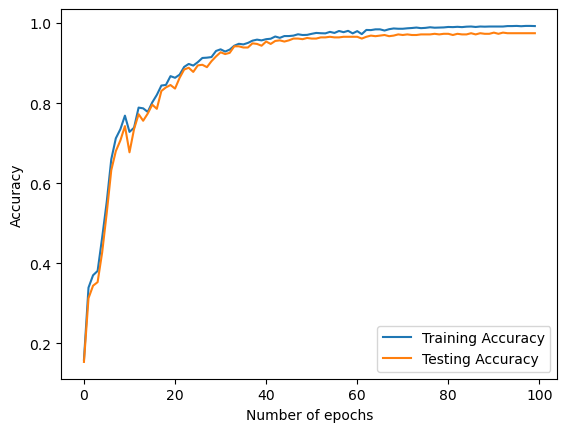

In [24]:
plt.plot(epochCount, trainAccCount, label = "Training Accuracy")
plt.plot(epochCount, testAccCount, label = "Testing Accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()

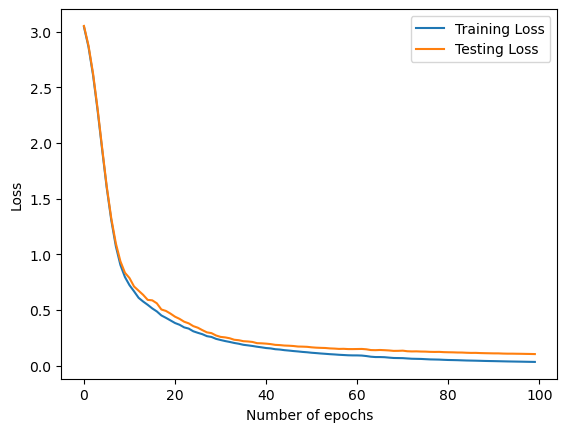

In [25]:
plt.plot(epochCount, trainLossCount, label = "Training Loss")
plt.plot(epochCount, testLossCount, label = "Testing Loss")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()

In [26]:
import mediapipe as mp
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(min_detection_confidence=0.7, min_tracking_confidence=0.5, max_num_hands=1)

In [28]:
modelPth = "../models/nnEngFeat"
torch.save(model_1.state_dict(), modelPth)